# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

#?! I noticed that some examples are grouping data by customers ? However my data set Dataset has 440 rows, 6 columns and doesn't have any customer grouping

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


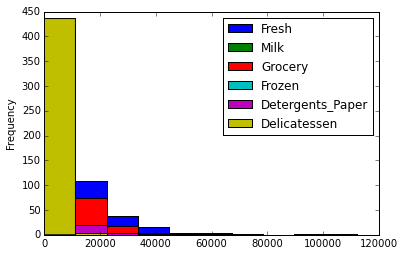

In [1]:
https://github.com/talenyc/CustomerSegmentation
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows
data.plot(kind='hist')

# Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer: We Should see that Delicatessen and Fresh dimmensions explain most of the variation in data

In [49]:
stnd = preprocessing.StandardScaler()
data_stnd = stnd.fit_transform(data)

###PCA

[[-0.04288396 -0.54511832 -0.57925635 -0.05118859 -0.5486402  -0.24868198]
 [-0.52793212 -0.08316765  0.14608818 -0.61127764  0.25523316 -0.50420705]
 [-0.81225657  0.06038798 -0.10838401  0.17838615 -0.13619225  0.52390412]
 [-0.23668559 -0.08718991  0.10598745  0.76868266  0.17174406 -0.55206472]
 [ 0.04868278 -0.82657929  0.31499943  0.02793224  0.33964012  0.31470051]
 [ 0.03602539  0.03804019 -0.72174458  0.01563715  0.68589373  0.07513412]]
[ 0.44082893  0.283764    0.12334413  0.09395504  0.04761272  0.01049519]
[<matplotlib.lines.Line2D object at 0x1174c89d0>, <matplotlib.lines.Line2D object at 0x1174c8c50>, <matplotlib.lines.Line2D object at 0x1174c8e90>, <matplotlib.lines.Line2D object at 0x1174d5090>, <matplotlib.lines.Line2D object at 0x1174d5250>, <matplotlib.lines.Line2D object at 0x1174d5410>]


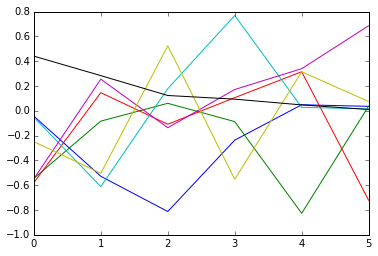

In [50]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA()


c_pca = pca.fit_transform(data_stnd)


# Print the components and the amount of variance in the data contained in each dimension
print pca.components_
print pca.explained_variance_ratio_
print plt.plot(pca.components_)
print plt.plot(pca.explained_variance_ratio_)
#plt.legend()

**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: Variance drops off after intoduction of second dimension, in fact 86% of variance can be explained by  2 columns. 

#? Is this most appropriate visualization. How to visulize just the primary
and secondary PC?
#? What does this tell me about the data

(440, 2)
0.724592924077


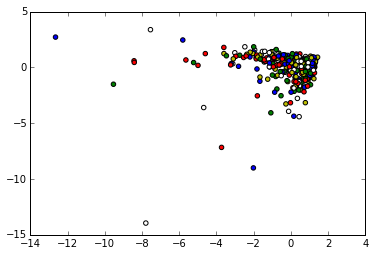

In [117]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
c_pca_prime = pca.fit_transform(data_stnd)
print c_pca_prime.shape
print pca.explained_variance_ratio_.sum()

axes =  plt.scatter(c_pca_prime[:,0:1], c_pca_prime[:,1:2] ,  c=['b', 'r', 'g', 'w' ,'y'], marker=u'o')




(-2, 1)

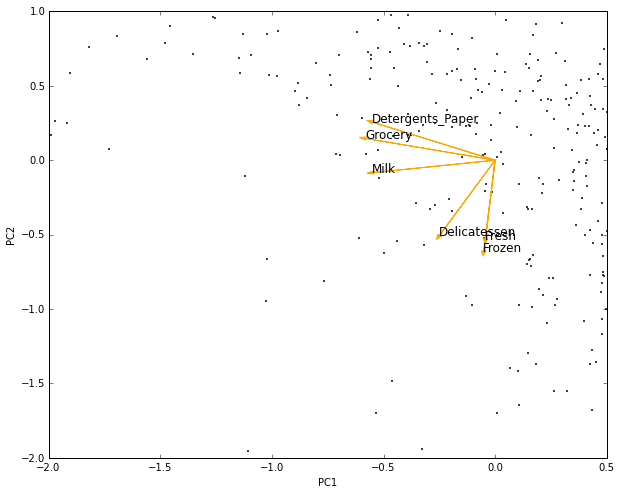

In [79]:
df = pd.DataFrame(data_stnd, columns=['Fresh',  'Milk' , 'Grocery'  ,'Frozen' , 'Detergents_Paper' , 'Delicatessen'])

def biplot(df):
    # Fit on 2 components
    pca = PCA(n_components=2, whiten=True).fit(data_stnd)
    
    # Plot transformed/projected data
    ax = pd.DataFrame(
        pca.transform(df),
        columns=['PC1', 'PC2']
    ).plot(kind='scatter', x='PC1', y='PC2', figsize=(10, 8), s=0.8)

    # Plot arrows and labels
    for i, (pc1, pc2) in enumerate(zip(pca.components_[0], pca.components_[1])):
        ax.arrow(0, 0, pc1, pc2, width=0.001, fc='orange', ec='orange')
        ax.annotate(df.columns[i], (pc1, pc2), size=12)

    return ax

ax = biplot(df)
# Play around with the ranges for scaling the plot
ax.set_xlim([-2, .5])
ax.set_ylim([-2, 1])


**3)** What do the dimensions seem to represent? How can you use this information?

Answer:  First two Dimmensions of PCA are two dimmensions that explain majority (86%) of variance in data. This is done by combining information from number of different original dimmensions to produce new dimmensions.  We can use this new dimmensions to represent the data in further machine learning algoritams, having advantage that we have reduced dimmensionality.   


From Above biplot we can see that customers can be grouped in 3-4 groups.

Detergent_Paper and Grocery
Milk 
Delicatessen 
Frozen 

The First Component places approximatly equal weight to Detergent_Paper and Grocery
Milk and much less weight to Delicatessen and Frozen 

The second component places most of its weight on Delicatessen & Frozen 

From this we can see that Detergent_Paper, Grocery and Milk are correlated to each other while Delicatesen and 
Frozen are in a category of their own.

By examining the differences between the customers via two principal components. Vectors suggest that Customers with high demand for Detergent / paper / Grocery and milk have little demand fro frozen and about 25% of demand for Delicatessen


###ICA

In [143]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
from sklearn import preprocessing

ica = FastICA()

stnd = preprocessing.StandardScaler()
ica_scale = preprocessing.StandardScaler()
data_stnd = stnd.fit_transform(data)


S_ = ica.fit_transform(data_stnd)
A_ = ica.mixing_
ica_data  /= ica_data.std(axis=0)

assert np.allclose(data_stnd, np.dot(S_, A_.T) + ica.mean_)


print pd.DataFrame(ica.components_,columns=data.columns).round(3)



   Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0 -0.002 -0.073    0.055   0.002            -0.016         0.017
1  0.004 -0.017   -0.115   0.007             0.134         0.016
2 -0.003  0.014   -0.061  -0.002             0.004         0.004
3 -0.050  0.006    0.006   0.003            -0.010         0.003
4  0.011  0.001   -0.007  -0.054             0.003         0.017
5  0.005  0.002    0.006   0.003            -0.002        -0.051


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: 
    Advantages are that we can find clusters of data, where clusteres are local mimimums of the distance between data points with K-means and soft mimiums with Gausian Model. 

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [17]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

#? what methods can be used to detirmine number of centroids ?
#? What is the meaning of each cluster centroid? How do we co-relate this back to the data?

In [18]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
reduced_data = c_pca_prime
print reduced_data[:10]  # print upto 10 elements

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


In [144]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'

clusters = KMeans(n_clusters=3)
clusters.fit(reduced_data)


print clusters

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


In [145]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [146]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

centroids = clusters.cluster_centers_
print centroids

[[  1341.31124554  25261.39189714]
 [-23978.86566553  -4445.56611772]
 [  4165.1217824   -3105.15811456]]


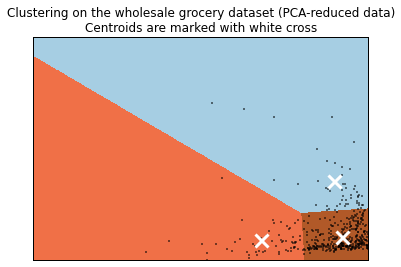

In [147]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: From PCA we idntified 3 grouping / correlations and I used this value as K . We can see that certain our customers can be devided in 3 such goroups as well.

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: PCA gave me most insight by showing the correlations and strong instrests of cusomers. 

**9)** How would you use that technique to help the company design new experiments?

Answer: We could use results of PCA as input parameters in regression 

**10)** How would you use that data to help you predict future customer needs?

Answer: By seeing what type of products customers are intersted and this can influence how we interact with them. 